# Advanced Jupyter topics

## Outline

1. Interfaces
2. Architectures
3. Exploration
4. Computation
5. Collaboration
6. Publishing

## 1. Interfaces

### Jupyter Notebook v6

https://github.com/jupyter/notebook/tree/6.x

- focused layout, 1 document = 1 browser tab/window.
- old good notebook everyone knows.

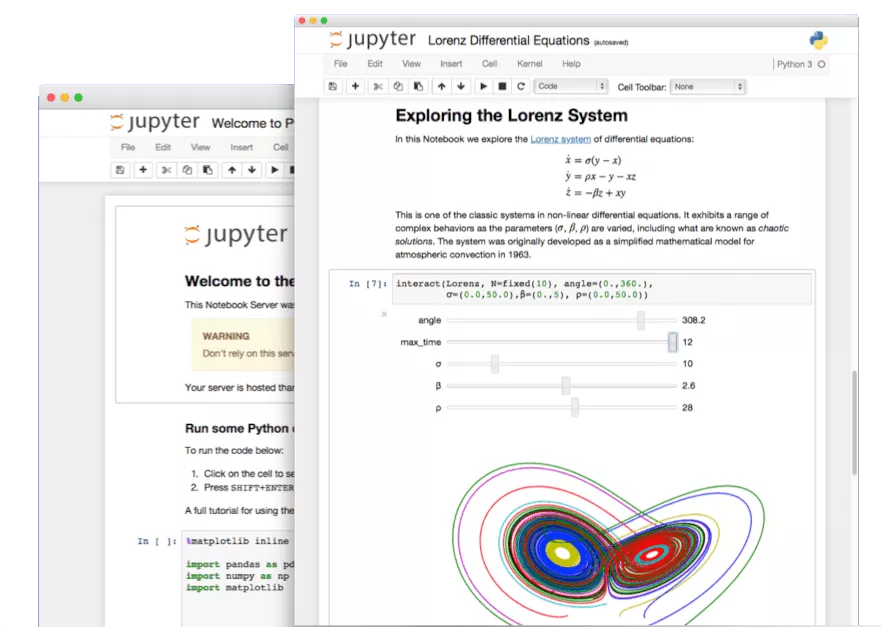

### JupyterLab

https://github.com/jupyterlab/jupyterlab

- multiple panels/documents at once + workspaces.
- compared to Notebook v6:
  - new extension ecosystem
    - many functions now built-in (ToC, collapsible headings, code folding), others have [replacements available](https://jupyterlab-contrib.github.io/migrate_from_classical.html)
  - new functions
    - real time collaboration*
    - graphical debugger,
    - variable preview,
    - progress bar,
    - Git integration (official extension),
    - LSP code intelligence (official extension)
  - modern, safe codebase
    - extensions less likely to break your notebook,
    - or pose a threat (but as always check what you install!)
  - since v3 using new architecture

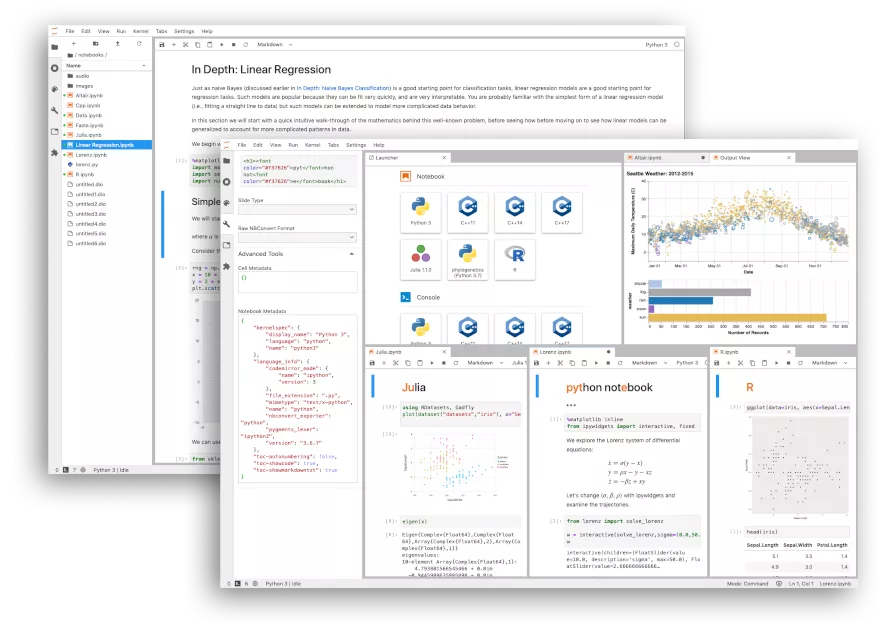

### <s>RetroLab</s> Jupyter Notebook v7

- https://github.com/jupyter/notebook
- https://jupyter.org/enhancement-proposals/79-notebook-v7/notebook-v7.html


- work-in-progress
- using JupyterLab codebase
- compatible with new extensions
- same look & feel as Notebook v6
   - teaching materials should **not** need updating
   - new docking areas to allow anchor points for extensions
- using new architecture

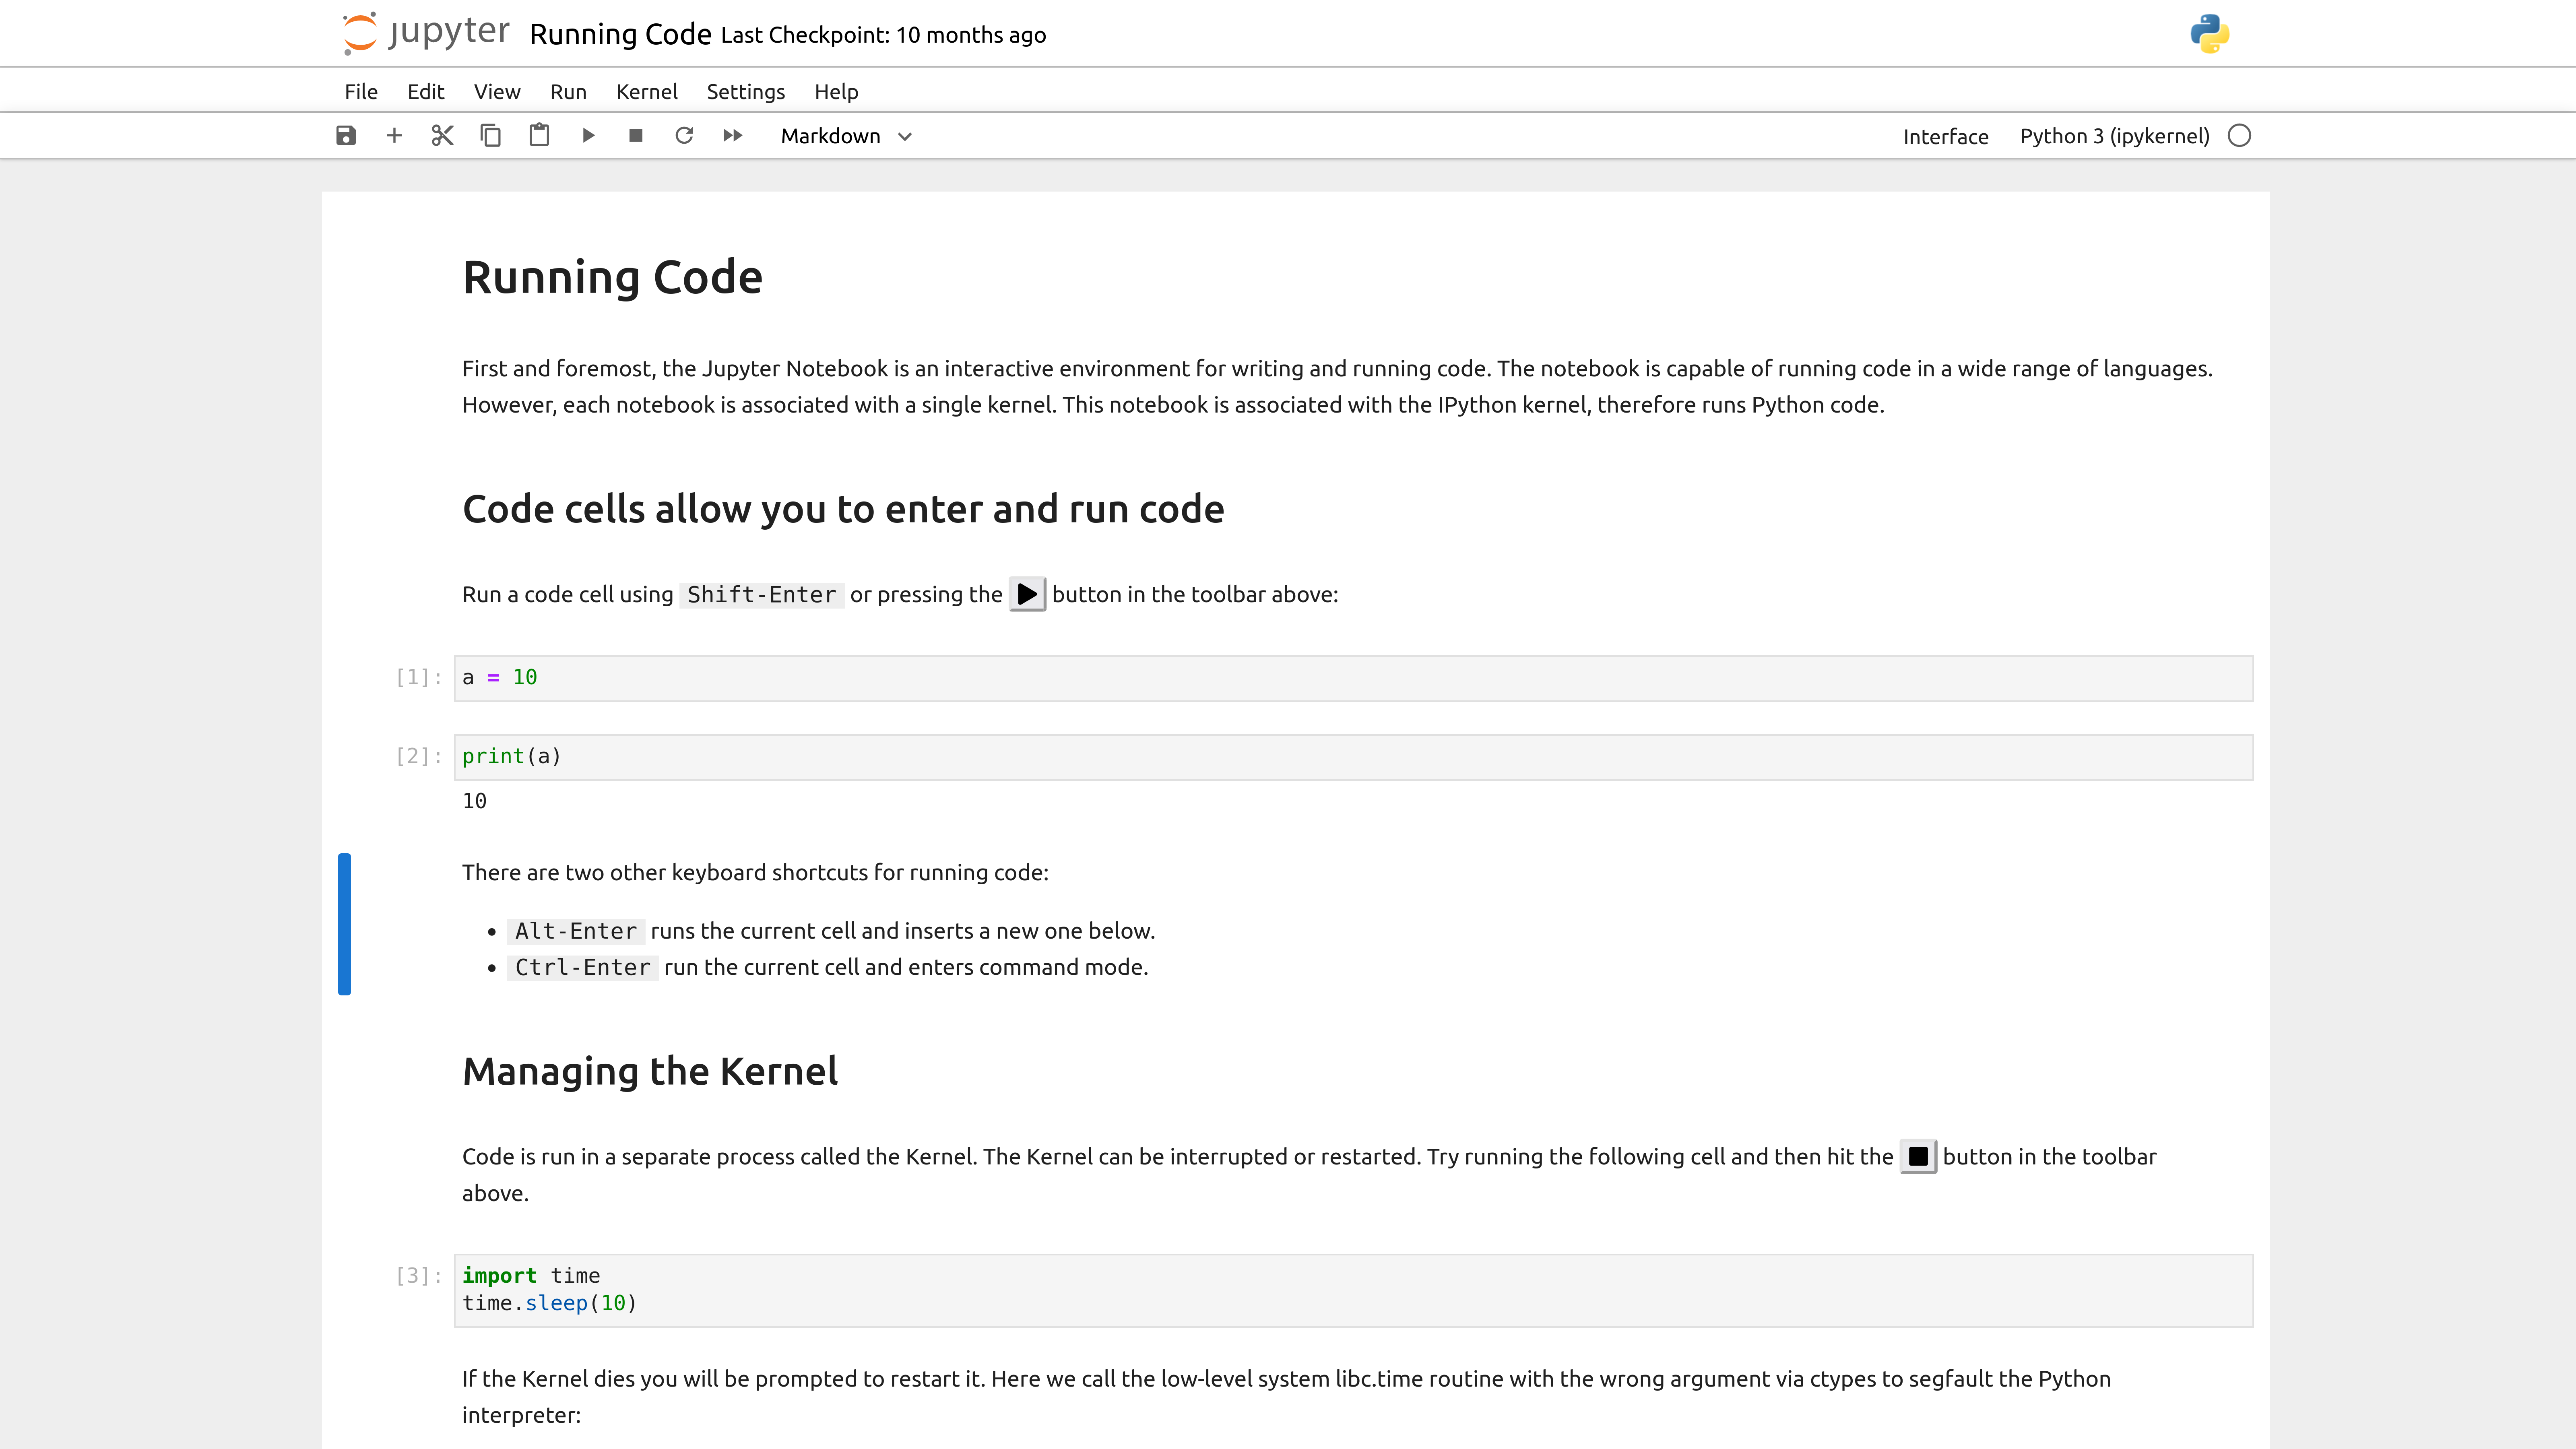

### JupyterLab Desktop

https://github.com/jupyterlab/jupyterlab-desktop

- JupyterLab but with its own browser
- just like many other applications you use (e.g. Slack, Teams)
- pros:
  - gets its own window*, no need to have terminal open
  - you can configure <kbd>Ctrl</kbd> + <kbd>Tab</kbd> (etc) to switch tabs*
  - virtual environment/python version picker
  - lowering entry barrier
- cons:
  - installation package large as it includes a browser
  - needs frequent updates to keep browser up to date with security patches

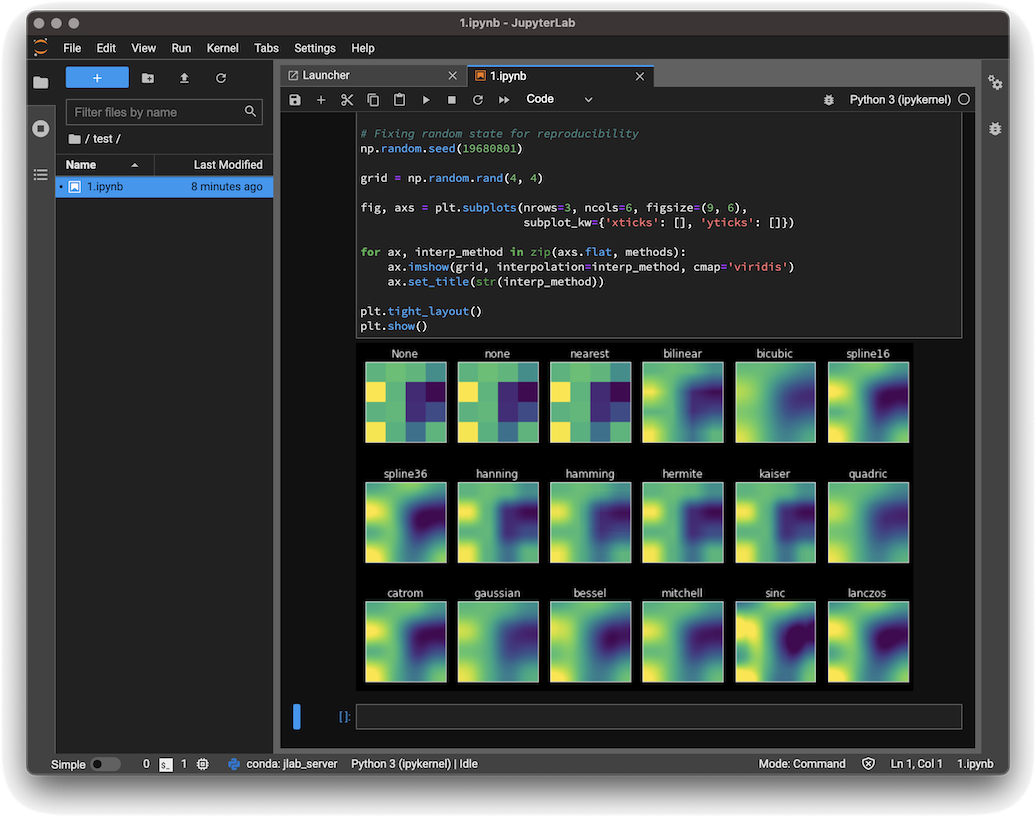

### Binder

https://mybinder.org/

- JupyterHub (server) hosted in the cloud, accessed from your browser
- running costs paid thanks to charitable donations of
  - Google Cloud
  - OVH
  - GESIS Notebooks 
  - Turing Institute
- pros:
  - tutorial/lectures: teach without the hassle of software installations
  - reproducible papers: allow peers to explore data/code in predefined environments
    <br>(which is guaranteed to work in future thanks to open architecture)
- cons:
  - limited funds → sometimes not enough spots available
  - first start after every change to repository can take 5-15 minutes (environment needs to be built)
  - only public repositories

### JupyterLite

https://github.com/jupyterlite/jupyterlite

- download to an USB stick, run at any computer\*; archive notebook with full environment
- Jupyter(Lab) but the server and kernel is run in the browser
- Background:
   - your browser = small Operating System
   - since 2017 includes WebAssembly (WASM), portable binary-code machine
   - any program can be compiled to WASM
   - CPython compiled to WASM is known as *pyodide*
   - pyodide includes lightweight `pip` replacement: `micropip`
- pros:
   - tutorials/lectures: does not rely on cloud resources being available (Binder)
   - super fast to load (assuming good internet connection)
- cons:
   - many MBs downloaded (Python, each PyPI package, etc)
   - virtual filesystem still needs to mature
- Try Lite:
  - [Retro (future Notebook v7)](https://jupyterlite.readthedocs.io/en/latest/try/lab)
  - [JupyterLab](https://jupyterlite.readthedocs.io/en/latest/try/lab)

\*) with a modern browser installed.

### Other interfaces

- Voila: notebooks as an interactive dashboards
- nteract: independent desktop app for Jupyter notebooks (close to Jupyter ecosystem)
- dozens of proprietary interfaces using Jupyter format (`.ipynb`) and parts of ecosystem (e.g. widgets)

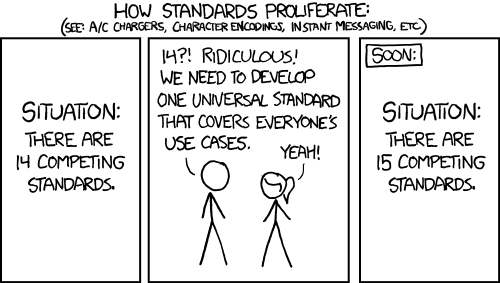

https://xkcd.com/927/

## 2. Architectures

### 2001-2014 IPython era

- first web interface circa 2010
- early years of web development
  - toothing years for web applications
- IPython was responsible for everything
- "Big split" in 2014:
  - `IPython.utils.traitlets` ⇒ traitlets
  - `IPython.config` ⇒ traitlets.config
  - `IPython.html` ⇒ notebook
  - `IPython.nbconvert` ⇒ nbconvert
  - `IPython.nbformat` -> nbformat
  - `IPython.parallel` ⇒ ipyparallel
  - `IPython.qt` ⇒ qtconsole
  - `IPython.terminal.console` ⇒ jupyter_console

### 2014-2019 Jupyter Notebook era

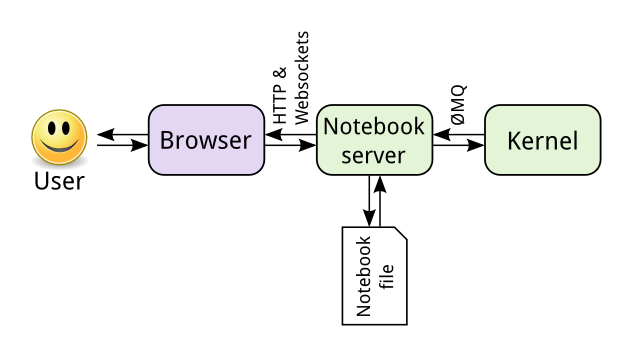
- easy to swap kernels, new kernels to complement `ipykernel` emerge:
   - IRkernel for R,
   - xeus-cling for C, C++
   - xeus-python (leading edge), xeus-sql, xeus-robot, etc
- `notebook` package still bundles:
   - "frontend" code (code sent to browser for interface rendering)
   - notebook server itself
- why this is sub-optimal?
  - security patch to server requires publication of `notebook` package (which is relied upon by everyone):
    - if regression in frontend code/dependency found, blocks/delays security release
    - needs more testing
  - ships frontend when not needed (e.g. JupterLab, custom deployments)
  - development potential: prevents swapping out the server

### 2019-2022: `jupyter-server`, `nbclassic`, `jupyverse`

- `notebook` split up into:
  - `jupyter-server` - server component (https://github.com/jupyter-server/jupyter_server)
  - `nbclassic` - classic Notebook v6 but with `jupyter-server` as a dependency
- migration plan
  - JupyterLab v3 uses `jupyter-server`
  - Notebook v6 remains unchanged (old notebook server)
  - Notebook v7 will use `jupyter-server`
  - (nteract uses `jupyter-server`)
- configurations and server extensions require migration
  - https://jupyter-server.readthedocs.io/en/latest/operators/migrate-from-nbserver.html
  - more on subsequent slides
- the future:
  - `jupyverse` - fully modular `jupyter-server` replacement based on Fast API
     - current tornado server written prior to `async` support in Python
     - better performance, RTC support

### Let's migrate

#### Which server do you use?

Run your Notebook/JupyterLab from terminal, do you see:

```
[I 14:00:00.000 NotebookApp] Jupyter Notebook 6.4.12 is running at:
```

or

```
[I 2022-06-21 14:00:00.000 ServerApp] Jupyter Server 1.17.1 is running at:
```

In general:
- `jupyter notebook`, `jupyter lab` (<v3.0) → old `notebook` server
- `jupyter server`, `jupyter lab` (v3.0+), `jupyter nbclassic` → new `jupyter-server`

#### Do you have extensions installed?

If not, install e.g. `pip install jupyterlab-git` / `conda install -c conda-forge jupyterlab-git`.

- users often confused about missing server extensions
- subtle command difference:
  - `serverextension` - `notebook` server vs
  - `server extension` - new `jupyter-server`
- different location on disk (in `jupyter --paths`):
  - `etc/jupyter/jupyter_server_config.d` vs
  - `etc/jupyter/jupyter_notebook_config.d`

Run:

In [ ]:
!jupyter serverextension list

compare with:

In [ ]:
!jupyter server extension list

#### Do you have old configuration?

- traitlet change:
  - `c.NotebookApp` → `c.ServerApp`
  - some traits moved; refer to full list of configs:
    - [for `jupyter-server`](https://jupyter-server.readthedocs.io/en/latest/other/full-config.html)
    - [for `jupyterlab-server`](https://jupyterlab-server.readthedocs.io/en/stable/api/app-config.html) (an extension of `jupyter-server` used by JupyterLab)
- files change:
  - `jupyter_notebook_config.py` → `jupyter_server_config.py`
  - `jupyter_notebook_config.json` → `jupyter_server_config.json`
- [documentation on migration](https://jupyter-server.readthedocs.io/en/latest/operators/migrate-from-nbserver.html)

### One level higher: JupyterHub

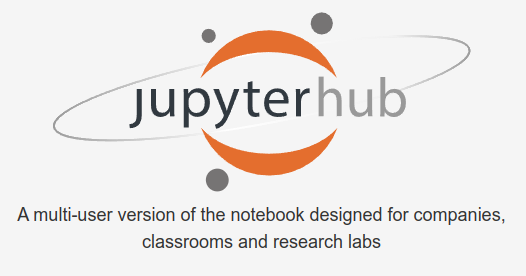

- adds authentication, user roles
- scalable to thousands of users
- multiple container/virtualisation systems supported depending on your needs
- FREE expert support available (for research and education): https://2i2c.org/

### Setup for your next project

#### By team size

| Team size | Solution | Real time collaboration? | Public? |
| ----------- | ----------- | -- | -- |
| 1    | JupyterLab Desktop/local server | - | no |
| 1-20 | Binder        | yes | yes |
| 1   | Self-managed server on HPC | yes | no |
| 1+, 5+ | JupyterHub        | yes | no |
| 1+   | Dedicated platform | not yet | no |
| 1+   | General-purpose platform | depends | no |

#### Biomedical-research dedicated platforms

| Platform | URL | Real time collaboration? | Known for | Native Jupyter? |
| -- | -- | -- | -- | -- |
| GenePattern (Broad Institute) | https://www.genepattern.org/ |  no* | Bioinformatics toolset | yes (Notebook/Lab) |
| DNANexus (Commercial) | https://www.dnanexus.com/ | no* | UK BioBank | yes (Lab) |
| Terra/AnVIL (Broad Institute, Microsoft) | https://terra.bio/<br>https://anvil.terra.bio | no | Large US datasets | yes (Notebook) |

#### General-purpose platforms

| Platform | URL | Real time collaboration? | GPU/TPU | Native Jupyter? |
| -- | -- | -- | -- | -- |
| Google Colab<br>(Collaboratory) | https://research.google.com/colaboratory/ | no* | yes | no* |
| Amazon SageMaker Studio Lab | https://studiolab.sagemaker.aws/ | no* | yes | <b>yes</b> |
| CoCalc<br>(colaborative calculation) | https://cocalc.com/ | yes | no* | no* |
| naas<br>(notebooks as a service) | https://naas.ai | no | no? | <b>yes</b> |
| Deepnote | https://deepnote.com/ | yes | yes | no |
| Datalore | https://datalore.jetbrains.com/ | yes | yes* | no |

#### If you choose to self-manage...

- reconsider: JupyterHub setup is likely worth it if your lab has 3+ users, help is available
- beware: [BMRC instructions](https://www.medsci.ox.ac.uk/divisional-services/support-services-1/bmrc/python-on-the-bmrc-cluster) still refer to `notebook` server
  - if you use `notebook` server but follow a tutorial to secure your installation written for `jupyter-server` configuration options (and vice versa), you may wrongly believe you secured your environment (but they would have no effect!)
- disabling token authentication might be tempting, but...
- do not ever:
  - disable token without configuring a password
  - enter password by hand in the config (use `jupyter server password` instead for hashed password)
- enable `https` (otherwise everyone can listen in!)
  - self-signed certificate might seem a hassle but it's just one line (+ optional saving it to your system)
  - instructions:
    - [for `notebook` server](https://jupyter-notebook.readthedocs.io/en/stable/public_server.html)
    - [for `jupyter-server`](https://jupyter-server.readthedocs.io/en/latest/operators/public-server.html#using-ssl-for-encrypted-communication)
- [security working group](https://github.com/jupyter/security)

## 3. Exploration

### Plots

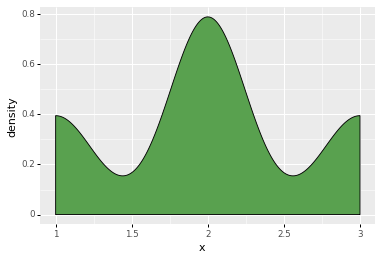

<ggplot: (8790126045793)>

In [4]:
from pandas import DataFrame
from plotnine import ggplot, aes, geom_density

df = DataFrame({'x': [1, 2, 2, 3]})
ggplot(df, aes(x='x')) + geom_density(fill='#59A14F')

### FASTA

JupyterLab [fasta-extension](https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/fasta-extension) provides capabilities of rendering large FASTA sequences:

In [3]:
from pathlib import Path
from widgets_demo import Fasta

data = Path('data/zika_assembled_genomes.fasta').read_text()
Fasta(data)

>EU545988.1|Micronesia|2007-06
------------------------------------------------------------
-----------------------------------------------ATGAAAAACCCCA
AAGAAGAAATCCGGAGGATCCGGATTGTCAATATGCTAAAACGCGGAGTAGCCCGTGTGA
GCCCCTTTGGGGGCTTGAAGAGGCTGCCAGCCGGACTTCTGCTGGGTCATGGGCCCATCA
GGATGGTCTTGGCGATACTAGCCTTTTTGAGATTCACGGCAATCAAGCCATCACTGGGTC
TCATCAATAGATGGGGTTCAGTGGGGAAAAAAGAGGCTATGGAAATAATAAAGAAGTTCA
AGAAAGATCTGGCTGCCATGCTGAGAATAATCAATGCTAGGAAGGAGAAGAAGAGACGAG
GCACAGATACTAGTGTCGGAATTGTTGGCCTCCTGCTGACCACAGCCATGGCAGTGGAGG
TCACTAGACGTGGGAGTGCATACTATATGTACTTGGACAGAAGCGATGCTGGGGAGGCCA
TATCTTTTCCAACCACACTGGGGATGAACAAGTGTTACATACAGATCATGGATCTTGGAC
ACATGTGTGATGCCACCATGAGCTATGAATGCCCTATGTTGGATGAGGGGGTAGAACCAG
ATGACGTCGATTGTTGGTGCAACACGACATCAACTTGGGTTGTGTACGGAACCTGCCACC
ACAAAAAAGGTGAAGCACGGAGATCTAGAAGAGCTGTGACGCTCCCCTCCCATTCCACTA
GGAAGCTGCAAACGCGGTCGCAGACCTGGTTGGAATCAAGAGAATATACAAAGCACCTGA
TTAGAGTCGAAAATTGGATATTCAGGAACCCTGGCTTCGCGTTAGCAGCAGCTGCCATCG
CCTGGCTTTTGGGAAGTTCAACGAGCCAAAAAGTCATATACTTGGTCATGATAC

### Molecular structures

Using [nglview](https://github.com/arose/nglview) - PDB structures (and much more!):

In [5]:
from nglview import show_pdbid

show_pdbid('3pqr')

NGLWidget()

### Imaging data

Using [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets):

![imaging](media/widgets/imaging.gif)

### Networks and pathways

In [7]:
from ipycytoscape import CytoscapeWidget
from json import loads
from pathlib import Path

tca_cycle = loads(Path('data/hsa00020.cyjs').read_text())
kegg_style = loads(Path('data/kegg-styles.json').read_text())

In [8]:
pathway_plot = CytoscapeWidget()
pathway_plot.graph.add_graph_from_json(tca_cycle['elements'])
pathway_plot.set_style(kegg_style[0]['style'])
pathway_plot.set_layout(name='preset')
pathway_plot

CytoscapeWidget(cytoscape_layout={'name': 'preset'}, cytoscape_style=[{'selector': 'node', 'css': {'border-opa…

In [9]:
from IPython.display import display
from cytoscape_widgets import change_spacing, set_layout
from ipywidgets import IntSlider, Select

spacing_widget = IntSlider(
    value=100,
    description='Spacing'
)
layout_choice_widget = Select(
    options=['cola', 'concentric', 'grid', 'breadthfirst', 'cose'],
    description='Layout'
)

display(layout_choice_widget, spacing_widget)

spacing_widget.observe(change_spacing(pathway_plot))
layout_choice_widget.observe(set_layout(pathway_plot))

Select(description='Layout', options=('cola', 'concentric', 'grid', 'breadthfirst', 'cose'), value='cola')

IntSlider(value=100, description='Spacing')

### Custom widget

A modified example from [Ipywdgets documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html):

In [10]:
from ipywidgets import interactive
from plotnine import ggplot, aes, geom_point, coord_fixed, ylim
from pandas import DataFrame, Series


def func(m, b):
    x = Series(range(-100, 100)) / 10
    df = DataFrame(dict(x=x, y=m * x + b))
    plot = (
        ggplot(df, aes(x='x', y='y'))
        + geom_point()
        + coord_fixed()
        + ylim(-10, 10)
    )
    plot.draw()


interactive_plot = interactive(func, m=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Tabular data

- Mito https://www.trymito.io/
- Qgrid https://github.com/quantopian/qgrid
- ipysheet https://github.com/QuantStack/ipysheet
- CSV editor https://github.com/jupyterlab-contrib/jupyterlab-spreadsheet-editor

### Writing custom extensions

- Full [extension tutorial](https://jupyterlab.readthedocs.io/en/stable/extension/extension_tutorial.html) - please reach out to me if you get stuck!
- Many [example extensions](https://github.com/jupyterlab/extension-cookiecutter-js) available.
- [Plugin playground](https://github.com/jupyterlab/jupyterlab-plugin-playground)
  - for simple proof-of-concept exploration of extension ideas
  - most examples work in playground
  - code intelligence 
- Three templates available:
  - [TypeScript](https://github.com/jupyterlab/extension-cookiecutter-ts) - complex, but it's ok
  - [JavaScript](https://github.com/jupyterlab/extension-cookiecutter-js) - much simpler
  - [MIME renderer](https://github.com/jupyterlab/mimerender-cookiecutter-ts) - for adding support for new file types, e.g. `.pdb` for protein structures
- Reading [API reference](https://jupyterlab.readthedocs.io/en/stable/api/index.html) and a good editor are essential!
- You can ask on [gitter](https://gitter.im/jupyterlab/jupyterlab) or [Jupyter Discourse](https://discourse.jupyter.org/)

### Exercise 1: data from an API (15 minutes)

Automating RCT trial description:
- should add a button to notebook panel
- after clicking on the button let's open an input dialog asking for trial ID/query
- fetch data from https://clinicaltrials.gov/api/
- insert trial data (title, organisation, status) into the currently active cell
- example query: `https://clinicaltrials.gov/api/query/full_studies?expr=NCT04001244&fmt=JSON`

Automating protein description:
- shoud add a button to notebook panel
- after clicking on the button let's open an input dialog asking for gene name
- fetch product protein data from https://www.ebi.ac.uk/proteins/api/doc/#!/proteins/search
- insert protein information (name, symbol, length) with link to UniProt into the currently active cell
- example query: 
`https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&reviewed=true&gene=tp53&taxid=9606`

For both:
- use https://github.com/jupyterlab/jupyterlab-plugin-playground and `citeExtension.ts` as a starting point
- follow explanations from [toolbar-button](https://github.com/jupyterlab/extension-examples/tree/master/toolbar-button) example

### Exercise 2: let's speak (10 minutes)

- add a button to notebook panel
- after clicking on the button let's read the text in the current cell out loud
- use https://developer.mozilla.org/en-US/docs/Web/API/SpeechSynthesis

## 4. Computation

### Interesting extensions

Containerized computing/notebook pipelines:
- Elyra (Kubeflow Pipelines, Apache Airflow)

Monitoring dashboards:
- dask
- nvidia
- tensorflow

#### `elyra`

Elyra is a re-distribution of JupyterLab developed by IBM:
- bundling many useful extensions
- providing pipeline editor and containerised workflow support

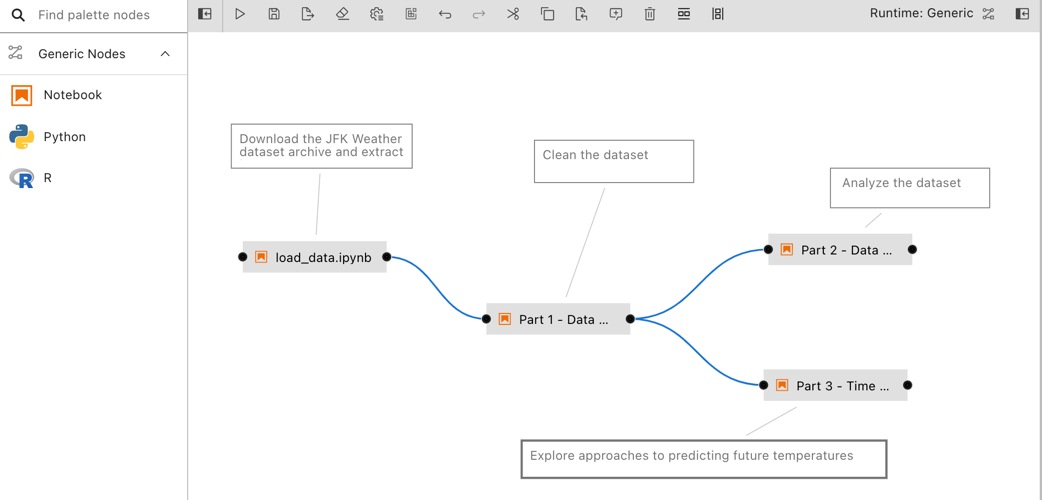

#### `dask-labextension`

https://github.com/dask/dask-labextension

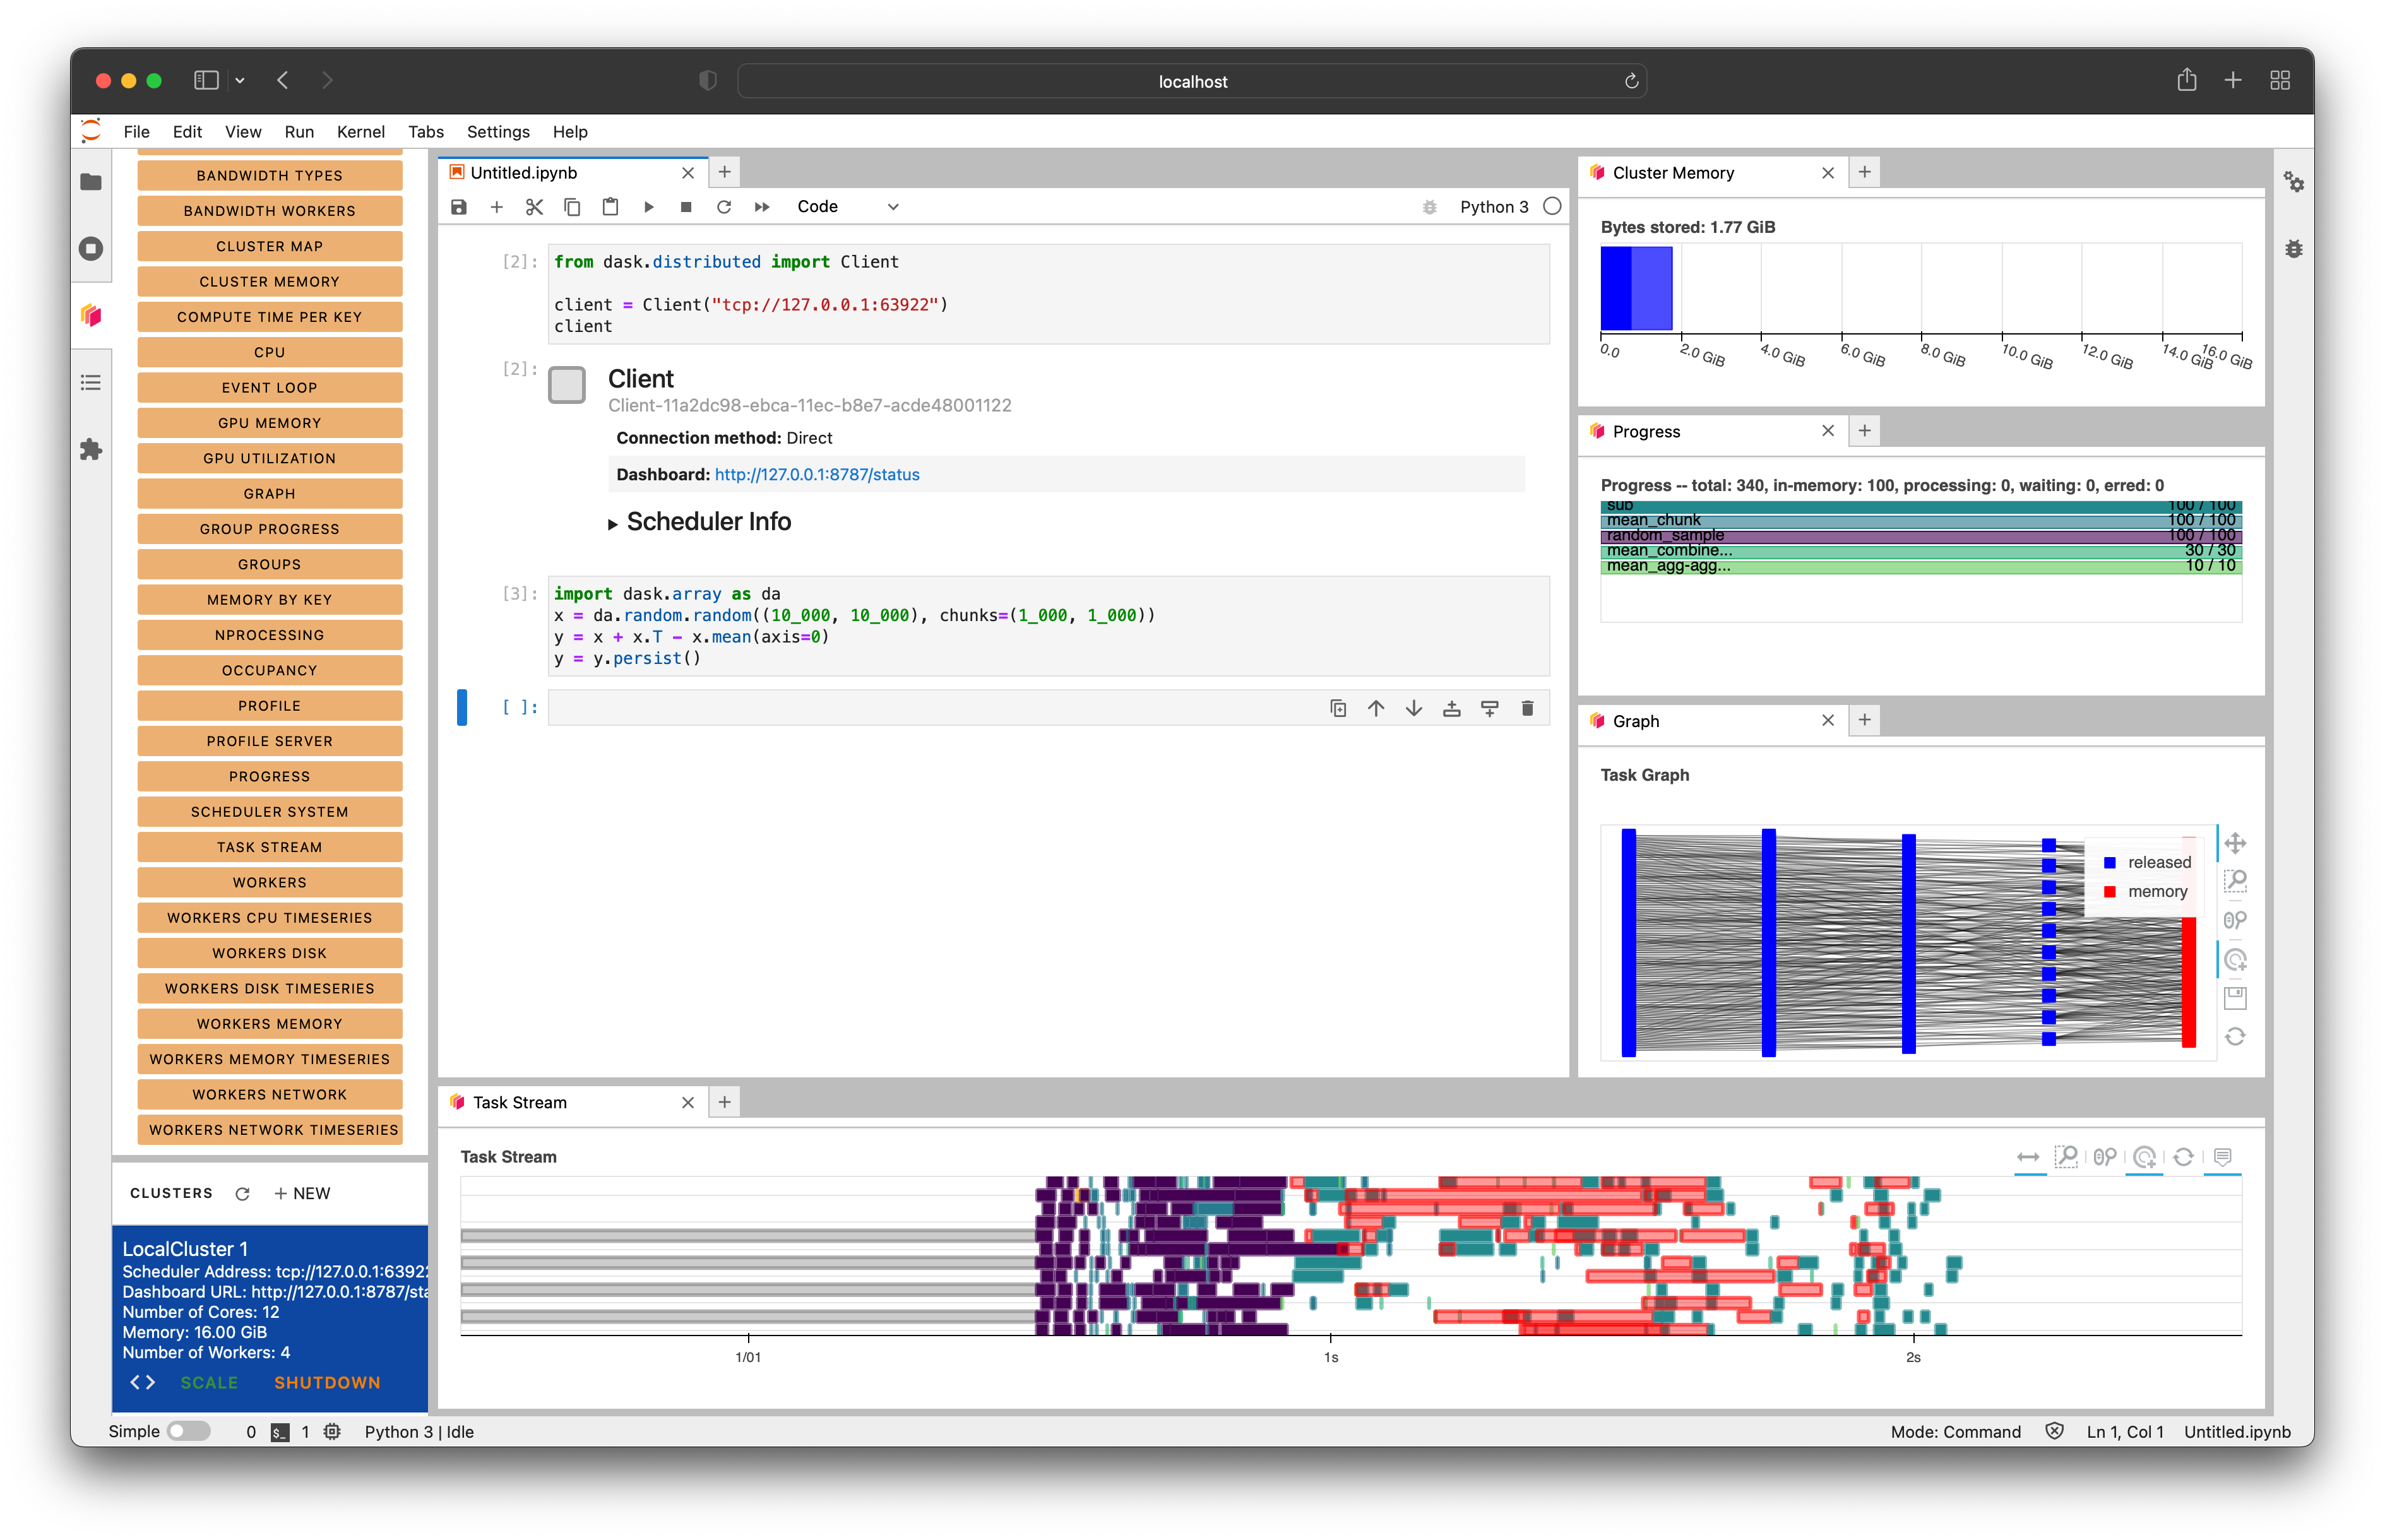

#### `jupyterlab-nvdashboard`

https://github.com/rapidsai/jupyterlab-nvdashboard

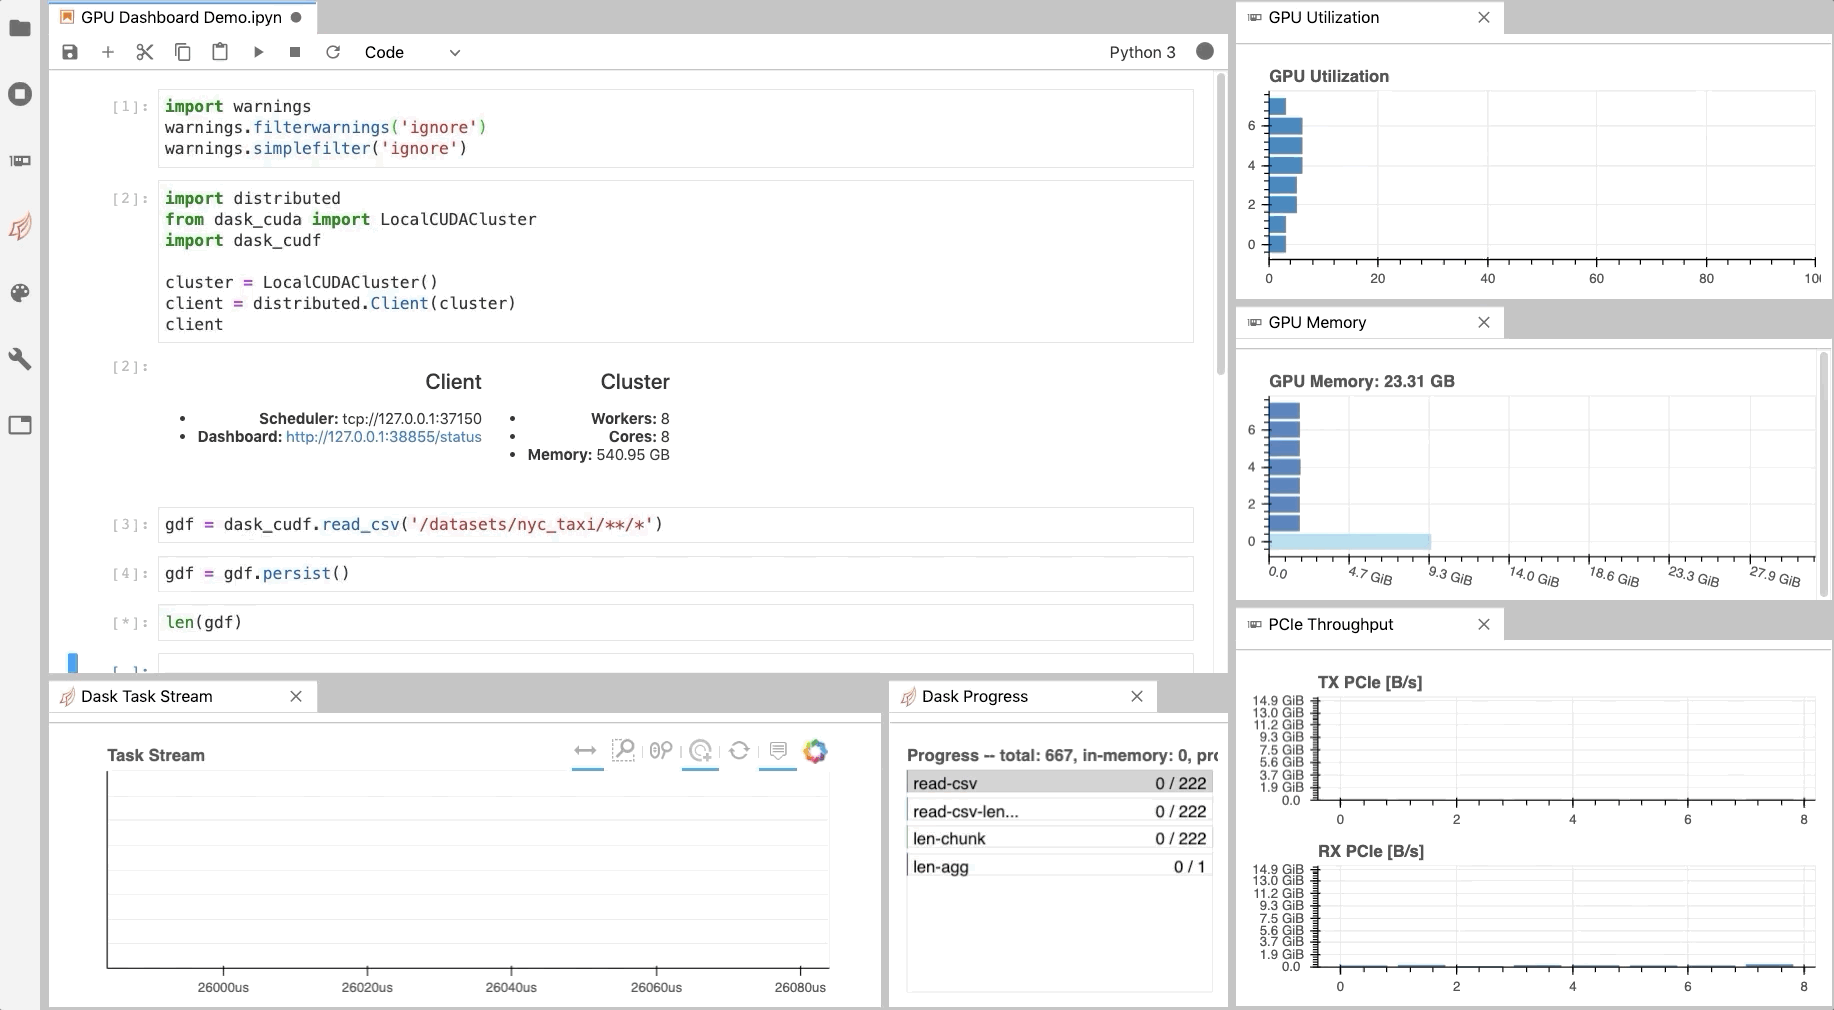

#### `jupyterlab_tensorboard`

https://github.com/chaoleili/jupyterlab_tensorboard/

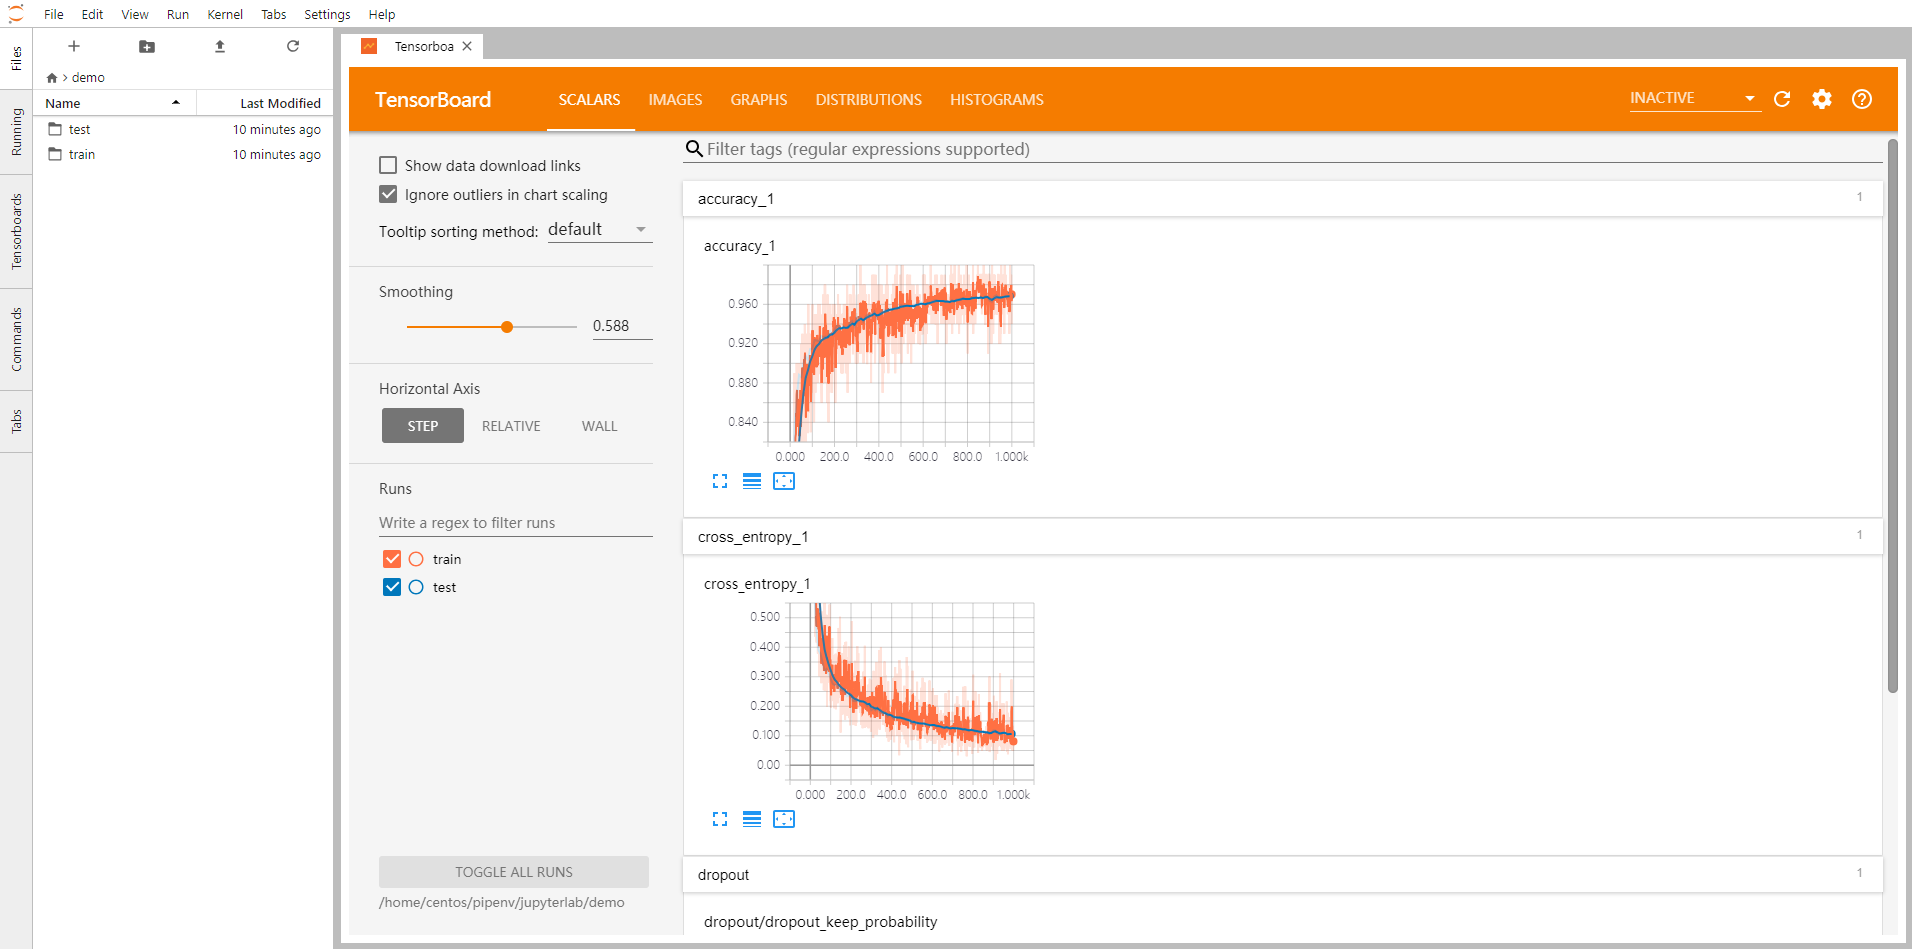

## 5. Collaboration

### Real time collaboration

https://jupyterlab.readthedocs.io/en/stable/user/rtc.html

Host:
- still experimental - back up your files!
- ensure JupyterLab in version 3.1 or newer
- install [`jupyterlab-link-share` extension](https://github.com/jupyterlab-contrib/jupyterlab-link-share), e.g. `pip install jupyterlab-link-share`
- if sharing from `localhost`: ensure they are in the same network (and firewall does not restrict port sharing)
- start JupyterLab (/notebook v7) in collaborative mode `jupyter lab --collaborative`
- copy link with token (note: adding `username` and `usercolor` and `initials`)

Try RTC on Binder with:
- [Notebook v7 alpha](https://gist.github.com/jtpio/d368ab89cee5123ecee60683115e15f3)
- [JupyterLab v3.4](https://gist.github.com/jtpio/dc217fb83255f54bf826a3804f5a0d7c)

## 6. Publishing

- Archiving: JupyterLite, Binder
- Books: Jupyter Book
- Dashboards: Voilà, Panel, [interactive-dashboard-editor](https://github.com/jupytercalpoly/jupyterlab-interactive-dashboard-editor)
- Quality control: LSP, spellchecker

### Jupyter Book

https://github.com/executablebooks/jupyter-book

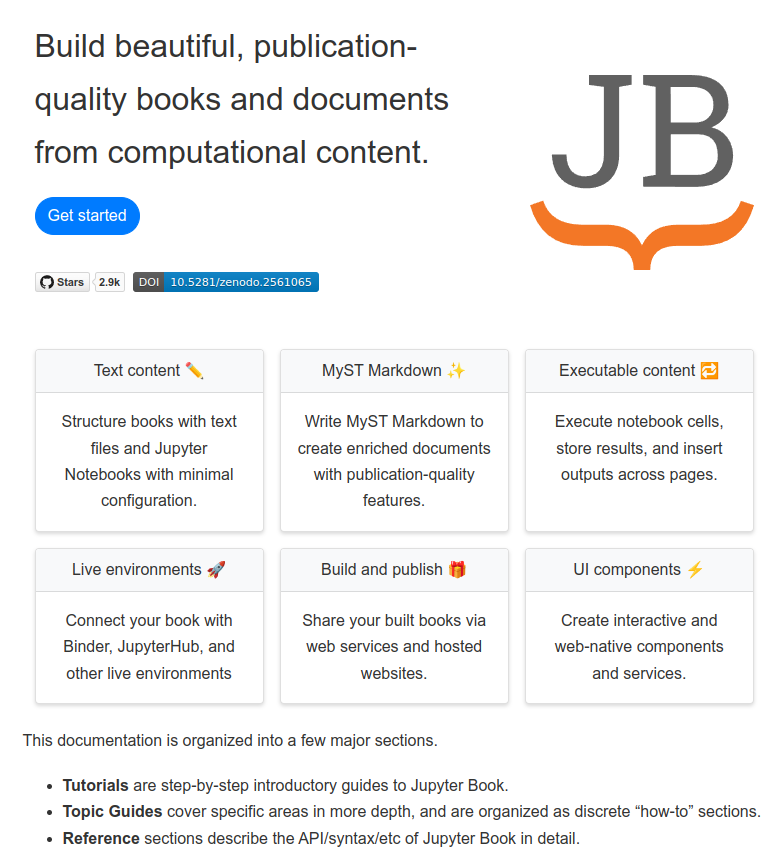

https://jupyterbook.org/en/stable/intro.html

E.g. https://compneuro.neuromatch.io/tutorials/intro.html

### Voilà

https://github.com/voila-dashboards/voila

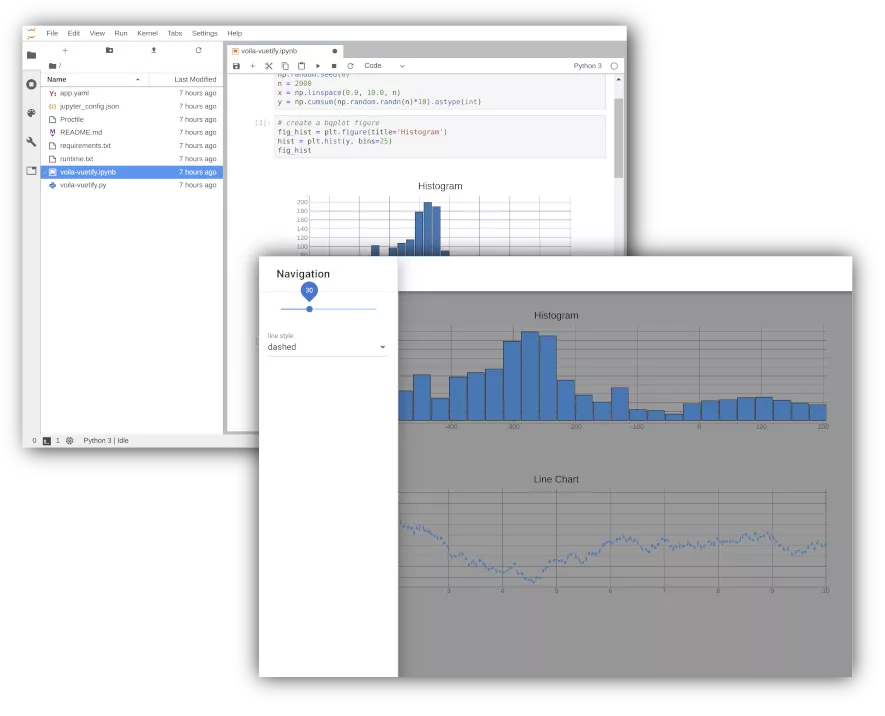

### Panel

https://github.com/holoviz/panel

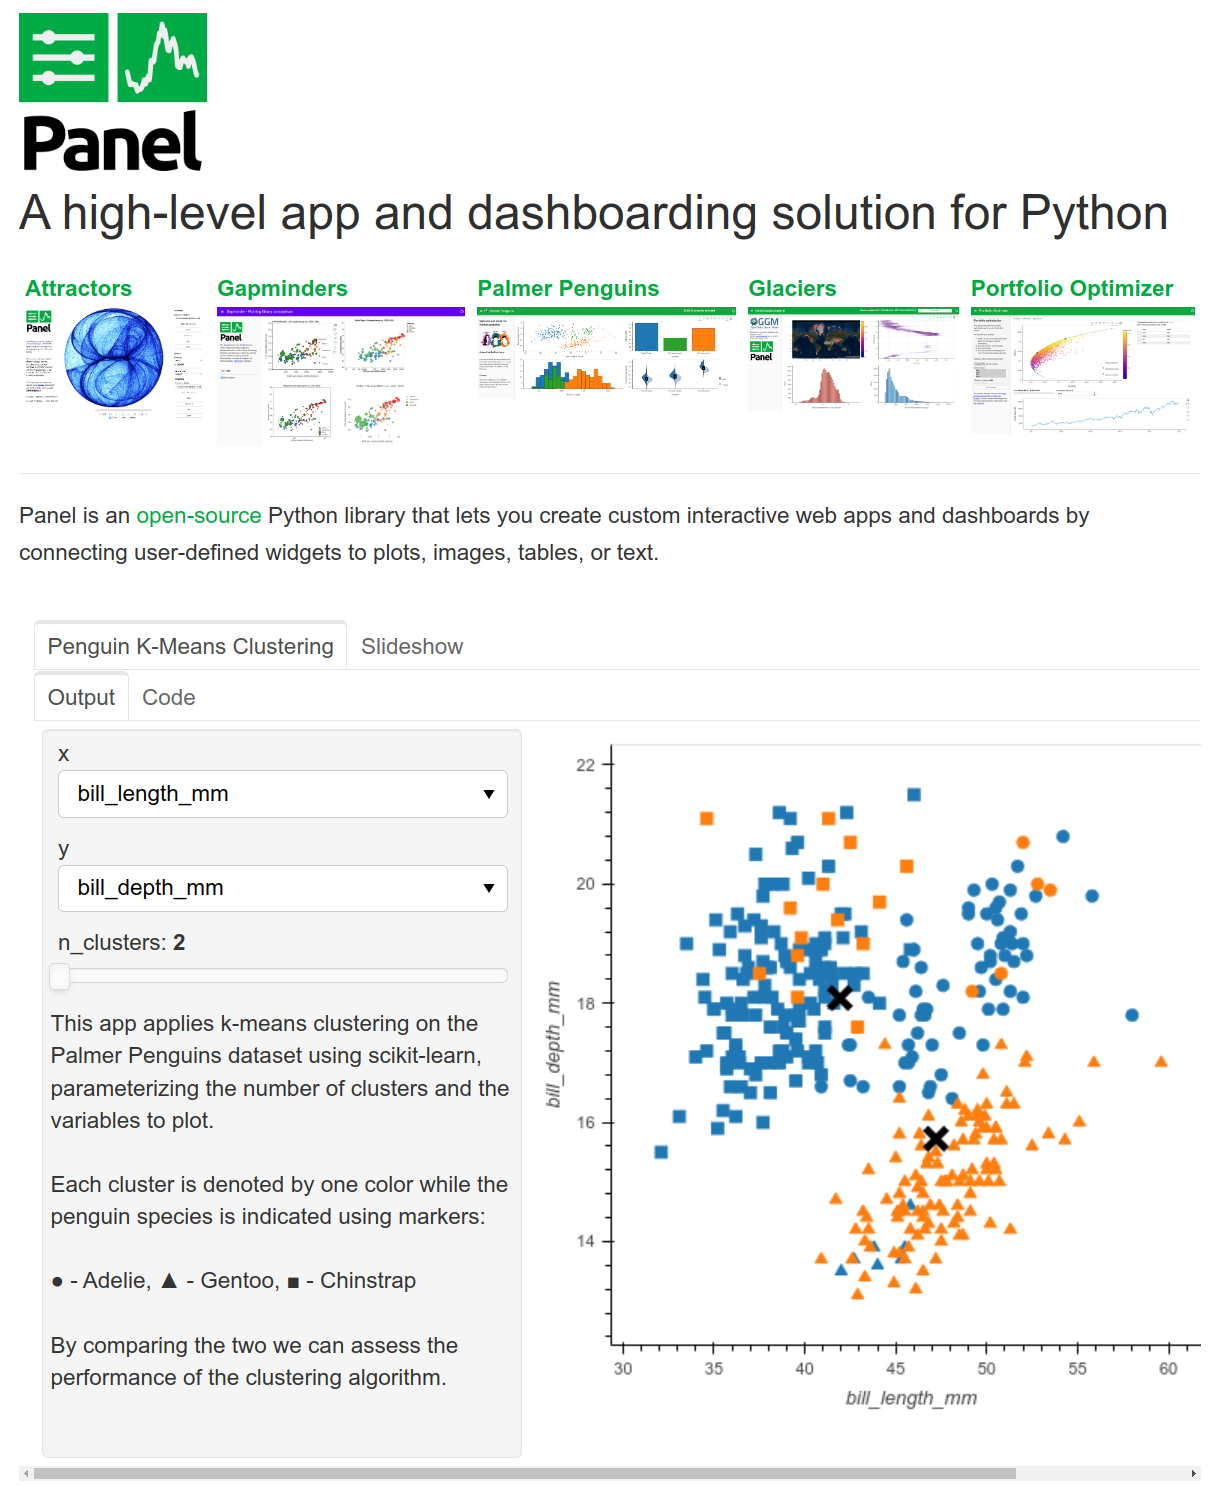

### Language Server Protocol

https://github.com/jupyter-lsp/jupyterlab-lsp

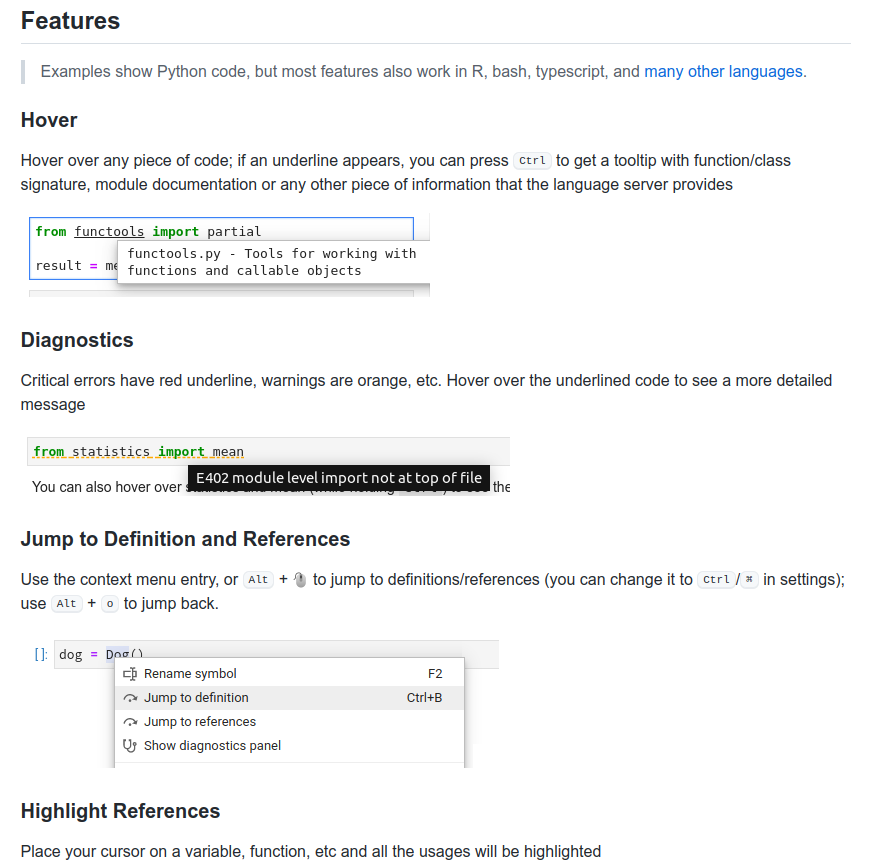

### Interesting extensions

- `jupyterlab-spellchecker` - [link](https://github.com/jupyterlab-contrib/spellchecker)
- `jupyterlab-citation-manager` - Zotero
- `markdown-it` - include variables in markdown
- `jupyterlab_markup` - markdown extensions 
  - support for JupyterBook (reST markdown) syntax
  - includes `markdown-it`

### Exercise: fix and linter erros typos in your notebook

In [ ]:
%pip install python-lsp-server[all]

### Exercise: create a Voilà dashboard

In [ ]:
%pip install voila-gridstack

In [ ]:
!voila --template=gridstack Examples_Jupyter_notebook.ipynb --VoilaConfiguration.resources='{"gridstack": {"show_handles": True}}'

### Exercise: deploy your notebook with JupyterLite

https://github.com/jupyterlite/demo